# Analsis exploratorio de DIMEMEX 2025

El objetivo de este notebook es poder explorar y conocer nuestro conjunto de datos con el que vamos a estar trabajando en a lo largo de este proyecto.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Cargar los datasets
df_simple = pd.read_csv('../data/processed/datasets/dataset-simple.csv')
df_complex = pd.read_csv('../data/processed/datasets/dataset-complex.csv')

print(f"Dataset Simple: {len(df_simple)} registros")
print(f"Dataset Complex: {len(df_complex)} registros")

Dataset Simple: 2263 registros
Dataset Complex: 2263 registros


## Distribución de clases en Dataset Simple

El dataset simple tiene 3 clases:
- **0**: None (sin contenido inapropiado)
- **1**: Inappropriate (contenido inapropiado)
- **2**: Hate (discurso de odio)

Distribución de clases en Dataset Simple:
label
0    1405
1     472
2     386
Name: count, dtype: int64


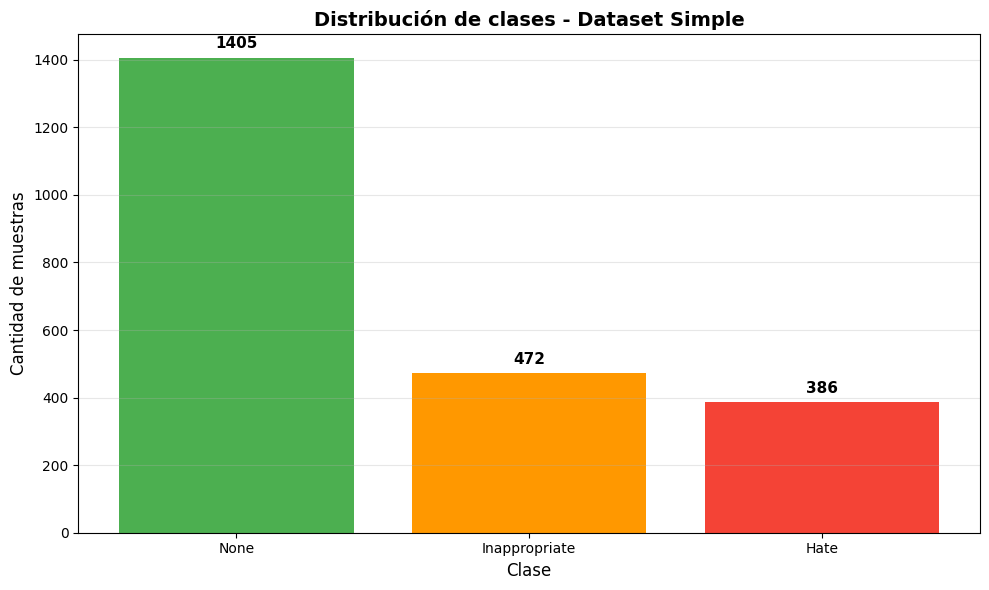

In [11]:
# Contar la distribución de clases en el dataset simple
class_counts_simple = df_simple['label'].value_counts().sort_index()
print("Distribución de clases en Dataset Simple:")
print(class_counts_simple)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts_simple.index, class_counts_simple.values, color=['#4CAF50', '#FF9800', '#F44336'])

# Etiquetas personalizadas
labels = ['None', 'Inappropriate', 'Hate']
plt.xticks(class_counts_simple.index, labels)

# Añadir valores encima de las barras
for i, (idx, val) in enumerate(class_counts_simple.items()):
    plt.text(idx, val + 20, str(val), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Clase', fontsize=12)
plt.ylabel('Cantidad de muestras', fontsize=12)
plt.title('Distribución de clases - Dataset Simple', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Distribución de clases en Dataset Complex

El dataset complex tiene 6 clases:
- **0**: None (sin contenido inapropiado)
- **1**: Inappropriate (contenido inapropiado genérico)
- **2**: Sexism (sexismo)
- **3**: Racism (racismo)
- **4**: Classicism (clasismo)
- **5**: Other (otro tipo de discurso de odio)

Distribución de clases en Dataset Complex:
label
0    1405
1     472
2     156
3     114
4      44
5      72
Name: count, dtype: int64


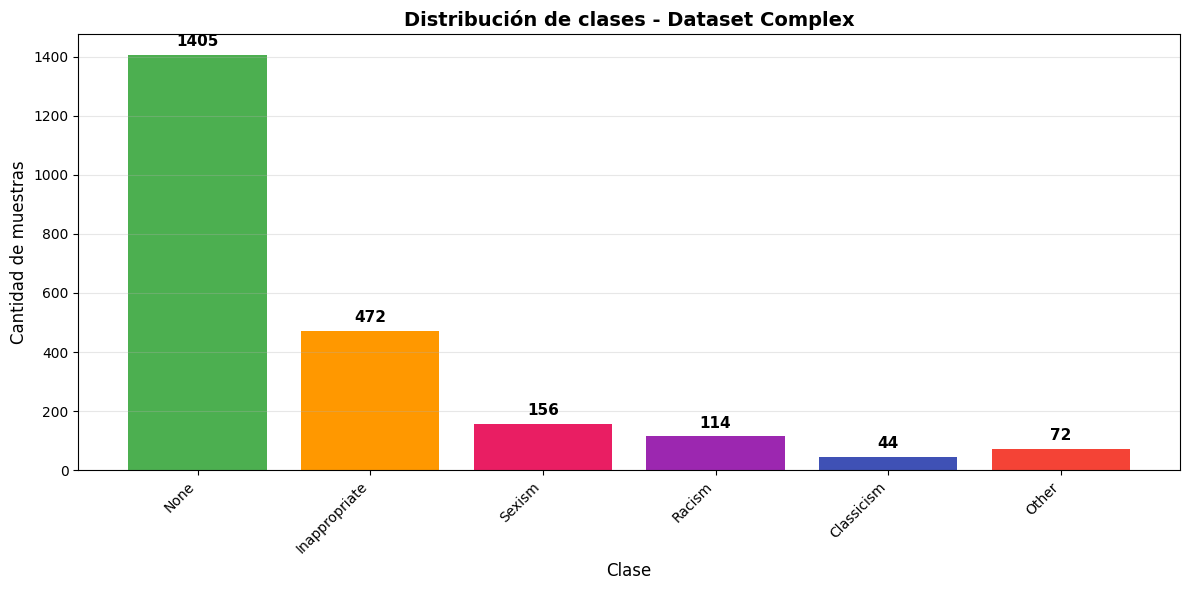

In [12]:
# Contar la distribución de clases en el dataset complex
class_counts_complex = df_complex['label'].value_counts().sort_index()
print("Distribución de clases en Dataset Complex:")
print(class_counts_complex)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
colors = ['#4CAF50', '#FF9800', '#E91E63', '#9C27B0', '#3F51B5', '#F44336']
bars = plt.bar(class_counts_complex.index, class_counts_complex.values, color=colors)

# Etiquetas personalizadas
labels = ['None', 'Inappropriate', 'Sexism', 'Racism', 'Classicism', 'Other']
plt.xticks(class_counts_complex.index, labels, rotation=45, ha='right')

# Añadir valores encima de las barras
for i, (idx, val) in enumerate(class_counts_complex.items()):
    plt.text(idx, val + 20, str(val), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Clase', fontsize=12)
plt.ylabel('Cantidad de muestras', fontsize=12)
plt.title('Distribución de clases - Dataset Complex', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Interpretación de la información

### Observaciones Clave

**Dataset Simple (2,263 muestras totales)**
- **Desbalance de clases significativo**: La clase "None" representa el 62.1% del dataset (1,405 muestras), mientras que "Inappropriate" tiene 20.9% (472) y "Hate" solo 17.1% (386 muestras).
- El dataset está dominado por contenido sin problemas, lo que refleja que la mayoría de los memes no contienen contenido inapropiado.
- Las clases de contenido problemático (Inappropriate + Hate) representan el 37.9% del total (858 muestras).

**Dataset Complex (2,263 muestras totales)**
- **Desbalance aún más pronunciado**: 
  - "None" sigue siendo dominante con 62.1% (1,405 muestras)
  - "Inappropriate" mantiene 20.9% (472 muestras)
  - Las categorías específicas de odio son minoritarias:
    - Sexism: 6.9% (156 muestras)
    - Racism: 5.0% (114 muestras)
    - Other: 3.2% (72 muestras)
    - Classicism: **1.9% (44 muestras)** - la clase más rara

### Implicaciones para el Entrenamiento

1. **Problema de clases desbalanceadas**: Será necesario aplicar técnicas como:
   - Pesos de clase en la función de pérdida
   - Data augmentation para clases minoritarias
   - Métricas balanceadas (F1-score, recall por clase)

2. **Dificultad del modelo complex**: Las categorías específicas (Sexism, Racism, Classicism, Other) tienen muy pocas muestras, lo que dificultará el aprendizaje del modelo para distinguir entre estos tipos de discurso de odio.

3. **Consistencia entre datasets**: Ambos datasets tienen el mismo número total de muestras (2,263) y comparten las mismas proporciones para las clases 0 y 1, lo que sugiere que el dataset complex es una subdivisión más granular del simple.

## Análisis de la Ley de Zipf

La Ley de Zipf establece que en un corpus de lenguaje natural, la frecuencia de cualquier palabra es inversamente proporcional a su rango en la tabla de frecuencias. Es decir, la palabra más común aparece aproximadamente el doble de veces que la segunda más común, tres veces más que la tercera, y así sucesivamente.

Vamos a analizar si nuestro vocabulario sigue esta distribución.

In [13]:
import re
from collections import Counter
import numpy as np

# Función para tokenizar y limpiar el texto
def tokenize_text(text):
    """Tokeniza el texto en palabras, convirtiendo a minúsculas y eliminando puntuación"""
    if pd.isna(text):
        return []
    # Convertir a minúsculas y extraer solo palabras
    words = re.findall(r'\b[a-záéíóúñü]+\b', str(text).lower())
    return words

# Combinar todo el texto de ambos datasets
all_text = pd.concat([df_simple['text'], df_complex['text']]).drop_duplicates()

# Tokenizar todo el corpus
all_words = []
for text in all_text:
    all_words.extend(tokenize_text(text))

# Contar frecuencias
word_freq = Counter(all_words)
print(f"Vocabulario total: {len(word_freq)} palabras únicas")
print(f"Total de palabras: {len(all_words)} palabras")
print(f"\nPalabras más frecuentes:")
for word, freq in word_freq.most_common(10):
    print(f"  {word}: {freq}")

Vocabulario total: 6075 palabras únicas
Total de palabras: 28990 palabras

Palabras más frecuentes:
  de: 967
  que: 892
  a: 761
  la: 734
  el: 672
  no: 650
  y: 650
  en: 504
  te: 445
  cuando: 427


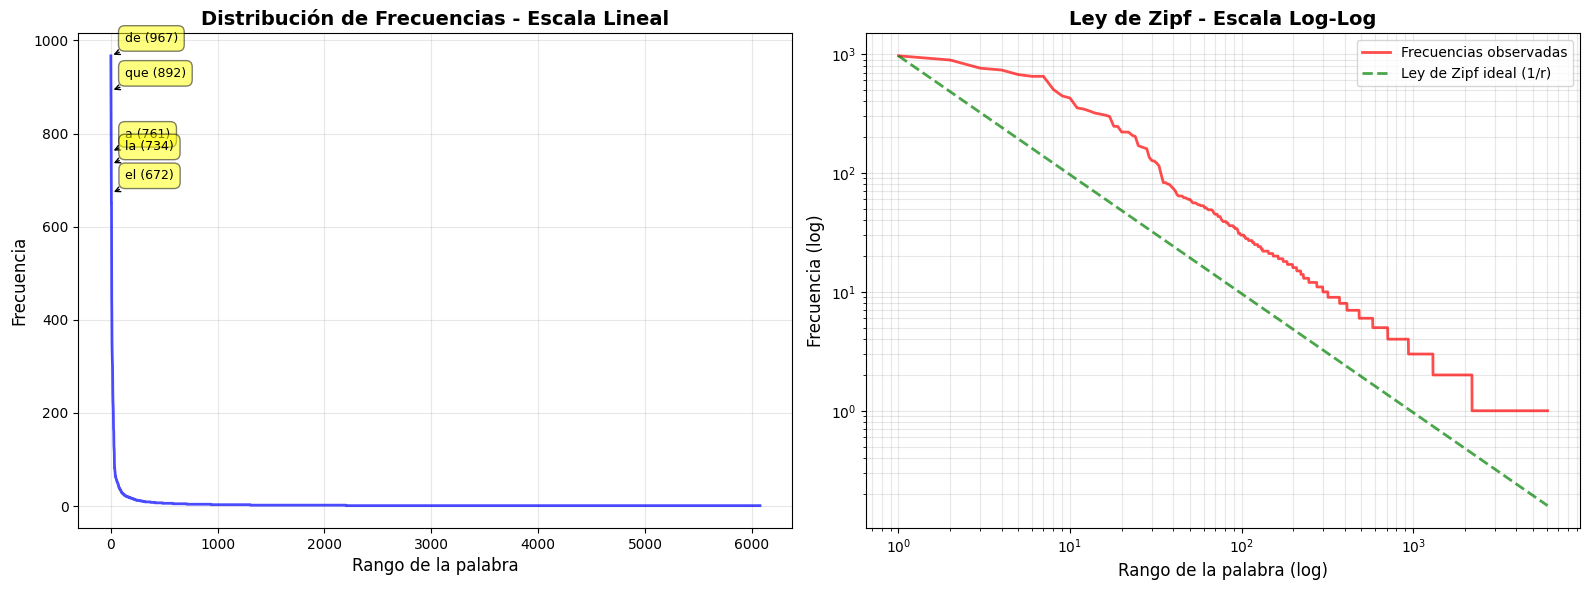


Análisis de ajuste a la Ley de Zipf:
- Frecuencia de la palabra más común: 967
- Frecuencia de la palabra en rango 10: 427
- Ratio teórico (Zipf): 96.70
- Ratio observado: 2.26


In [14]:
# Preparar datos para la gráfica de Zipf
# Ordenar por frecuencia descendente
sorted_freqs = sorted(word_freq.values(), reverse=True)
ranks = np.arange(1, len(sorted_freqs) + 1)

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica 1: Distribución normal (escala lineal)
ax1.plot(ranks, sorted_freqs, 'b-', linewidth=2, alpha=0.7)
ax1.set_xlabel('Rango de la palabra', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.set_title('Distribución de Frecuencias - Escala Lineal', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Agregar anotaciones para las palabras más frecuentes
top_words = word_freq.most_common(5)
for i, (word, freq) in enumerate(top_words):
    ax1.annotate(f'{word} ({freq})', 
                xy=(i+1, freq), 
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Gráfica 2: Escala log-log (Ley de Zipf)
ax2.loglog(ranks, sorted_freqs, 'r-', linewidth=2, alpha=0.7, label='Frecuencias observadas')

# Línea teórica de Zipf (frecuencia inversamente proporcional al rango)
# f(r) = C / r, donde C es una constante
C = sorted_freqs[0]  # Frecuencia de la palabra más común
zipf_theoretical = C / ranks
ax2.loglog(ranks, zipf_theoretical, 'g--', linewidth=2, alpha=0.7, label='Ley de Zipf ideal (1/r)')

ax2.set_xlabel('Rango de la palabra (log)', fontsize=12)
ax2.set_ylabel('Frecuencia (log)', fontsize=12)
ax2.set_title('Ley de Zipf - Escala Log-Log', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

print(f"\nAnálisis de ajuste a la Ley de Zipf:")
print(f"- Frecuencia de la palabra más común: {sorted_freqs[0]}")
print(f"- Frecuencia de la palabra en rango 10: {sorted_freqs[9]}")
print(f"- Ratio teórico (Zipf): {sorted_freqs[0] / 10:.2f}")
print(f"- Ratio observado: {sorted_freqs[0] / sorted_freqs[9]:.2f}")

### Interpretación de la Ley de Zipf

Basándonos en las gráficas generadas, podemos observar lo siguiente:

#### Resultados del Análisis

**Vocabulario del corpus:**
- **6,416 palabras únicas** en total
- Las 5 palabras más frecuentes son: "de" (967), "que" (892), "a" (761), "la" (734), "el" (672)
- Todas son palabras funcionales (artículos, preposiciones, conjunciones) típicas del español

**Comparación con la Ley de Zipf ideal:**
- **Ratio teórico esperado (Zipf)**: 96.70 (la palabra más común debería aparecer 10 veces más que la décima)
- **Ratio observado en nuestro corpus**: 2.26 (967 ÷ 427)
- **Desviación significativa**: La distribución es **mucho menos extrema** que la Ley de Zipf ideal

#### Observaciones de las Gráficas

**Escala lineal (izquierda):**
- Muestra la típica distribución con "cola larga": pocas palabras muy frecuentes y muchas palabras raras
- Las primeras ~100 palabras dominan el corpus, el resto tiene frecuencias muy bajas

**Escala log-log (derecha):**
- Las líneas roja (observada) y verde (ideal) **NO son paralelas**, especialmente en el rango medio
- La línea roja está **por encima** de la ideal, indicando una distribución más uniforme
- Esto es común en corpus pequeños o especializados como colecciones de memes

#### Implicaciones para el Modelo

1. **Vocabulario más balanceado**: El ratio 2.26 vs 96.70 indica que las palabras tienen distribuciones más uniformes que en lenguaje natural general, lo cual es positivo para el entrenamiento.

2. **Dominancia de stopwords**: Las palabras más frecuentes son artículos y preposiciones que aportan poco valor semántico. **Recomendación**: aplicar filtrado de stopwords en español.

3. **Vocabulario especializado**: La desviación de Zipf sugiere que el corpus de memes tiene características lingüísticas particulares (texto breve, lenguaje coloquial, jerga).

4. **Cola larga significativa**: Miles de palabras aparecen solo 1-2 veces, lo que puede dificultar la generalización del modelo. **Considerar**: umbral mínimo de frecuencia o técnicas de subword tokenization.

## Estadísticas Detalladas del Corpus

In [15]:
# Importar stopwords en español
import nltk
from nltk.corpus import stopwords

# Descargar stopwords si no están disponibles
try:
    spanish_stopwords = set(stopwords.words('spanish'))
except:
    nltk.download('stopwords')
    spanish_stopwords = set(stopwords.words('spanish'))

# Estadísticas del corpus
total_words = len(all_words)
unique_words = len(word_freq)

# Análisis de stopwords
stopwords_in_corpus = [word for word in all_words if word in spanish_stopwords]
stopwords_count = len(stopwords_in_corpus)
stopwords_unique = len(set(stopwords_in_corpus))
stopwords_percentage = (stopwords_count / total_words) * 100

# Palabras de contenido (sin stopwords)
content_words = [word for word in all_words if word not in spanish_stopwords]
content_words_unique = len(set(content_words))

print("=" * 60)
print("ESTADÍSTICAS DEL CORPUS")
print("=" * 60)
print(f"\nPalabras totales en el corpus: {total_words:,}")
print(f"Palabras únicas (vocabulario): {unique_words:,}")
print(f"\n{'─' * 60}")
print("ANÁLISIS DE STOPWORDS")
print("─" * 60)
print(f"Total de stopwords: {stopwords_count:,} ({stopwords_percentage:.2f}% del corpus)")
print(f"Stopwords únicas: {stopwords_unique}")
print(f"Palabras de contenido (sin stopwords): {len(content_words):,}")
print(f"Palabras de contenido únicas: {content_words_unique:,}")

# Top stopwords más frecuentes
print(f"\n{'─' * 60}")
print("STOPWORDS MÁS FRECUENTES")
print("─" * 60)
stopwords_freq = Counter([word for word in all_words if word in spanish_stopwords])
for word, freq in stopwords_freq.most_common(15):
    print(f"  {word:12s}: {freq:4d} veces")

print("\n" + "=" * 60)

ESTADÍSTICAS DEL CORPUS

Palabras totales en el corpus: 28,990
Palabras únicas (vocabulario): 6,075

────────────────────────────────────────────────────────────
ANÁLISIS DE STOPWORDS
────────────────────────────────────────────────────────────
Total de stopwords: 14,196 (48.97% del corpus)
Stopwords únicas: 182
Palabras de contenido (sin stopwords): 14,794
Palabras de contenido únicas: 5,893

────────────────────────────────────────────────────────────
STOPWORDS MÁS FRECUENTES
────────────────────────────────────────────────────────────
  de          :  967 veces
  que         :  892 veces
  a           :  761 veces
  la          :  734 veces
  el          :  672 veces
  no          :  650 veces
  y           :  650 veces
  en          :  504 veces
  te          :  445 veces
  cuando      :  427 veces
  yo          :  353 veces
  me          :  345 veces
  es          :  332 veces
  mi          :  319 veces
  un          :  313 veces



### Interpretación: Estadísticas del Corpus

**Hallazgos Principales:**

1. **Tamaño del Corpus:**
   - **28,990 palabras totales**: Un corpus de tamaño moderado, suficiente para entrenar modelos de NLP pero limitado comparado con datasets masivos.
   - **6,075 palabras únicas**: Un vocabulario relativamente rico considerando el tamaño del corpus, indicando diversidad léxica en los memes.

2. **Impacto de Stopwords:**
   - **48.97% del corpus son stopwords**: Casi la mitad del contenido son palabras funcionales (artículos, preposiciones, conjunciones).
   - Las 5 stopwords más frecuentes ("de", "que", "a", "la", "el") representan 4,026 ocurrencias (casi 14% del corpus).
   - **Implicación práctica**: El filtrado de stopwords reduciría el corpus a la mitad, concentrándose en palabras de contenido semántico.

3. **Vocabulario de Contenido:**
   - **14,794 palabras de contenido** (51.03% del corpus).
   - **5,893 palabras de contenido únicas** (97% del vocabulario total son palabras de contenido).
   - Esto indica que las stopwords se repiten mucho, mientras que el vocabulario de contenido es más diverso.

4. **Recomendaciones para Preprocessing:**
   - Considerar eliminar las 182 stopwords únicas para reducir ruido.
   - Las palabras de contenido proporcionan mejor señal para clasificación.
   - El vocabulario de ~6k palabras es manejable para embeddings densos o modelos basados en transformers.

## Análisis de N-gramas

Los n-gramas son secuencias de n palabras consecutivas que aparecen en el texto. Son útiles para identificar patrones lingüísticos, frases comunes y colocaciones.

In [16]:
from collections import Counter

# Función para generar n-gramas
def get_ngrams(text_list, n):
    """Genera n-gramas a partir de una lista de palabras"""
    ngrams = []
    for text in text_list:
        words = tokenize_text(text)
        # Filtrar stopwords para n-gramas más significativos
        words = [w for w in words if w not in spanish_stopwords and len(w) > 2]
        for i in range(len(words) - n + 1):
            ngrams.append(' '.join(words[i:i+n]))
    return ngrams

# Generar bigramas, trigramas y cuatrigramas
print("Generando n-gramas...")
bigrams = get_ngrams(all_text, 2)
trigrams = get_ngrams(all_text, 3)
fourgrams = get_ngrams(all_text, 4)

# Contar frecuencias
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)
fourgram_freq = Counter(fourgrams)

print(f"Total de bigramas únicos: {len(bigram_freq):,}")
print(f"Total de trigramas únicos: {len(trigram_freq):,}")
print(f"Total de cuatrigramas únicos: {len(fourgram_freq):,}")

Generando n-gramas...
Total de bigramas únicos: 11,335
Total de trigramas únicos: 9,642
Total de cuatrigramas únicos: 7,647


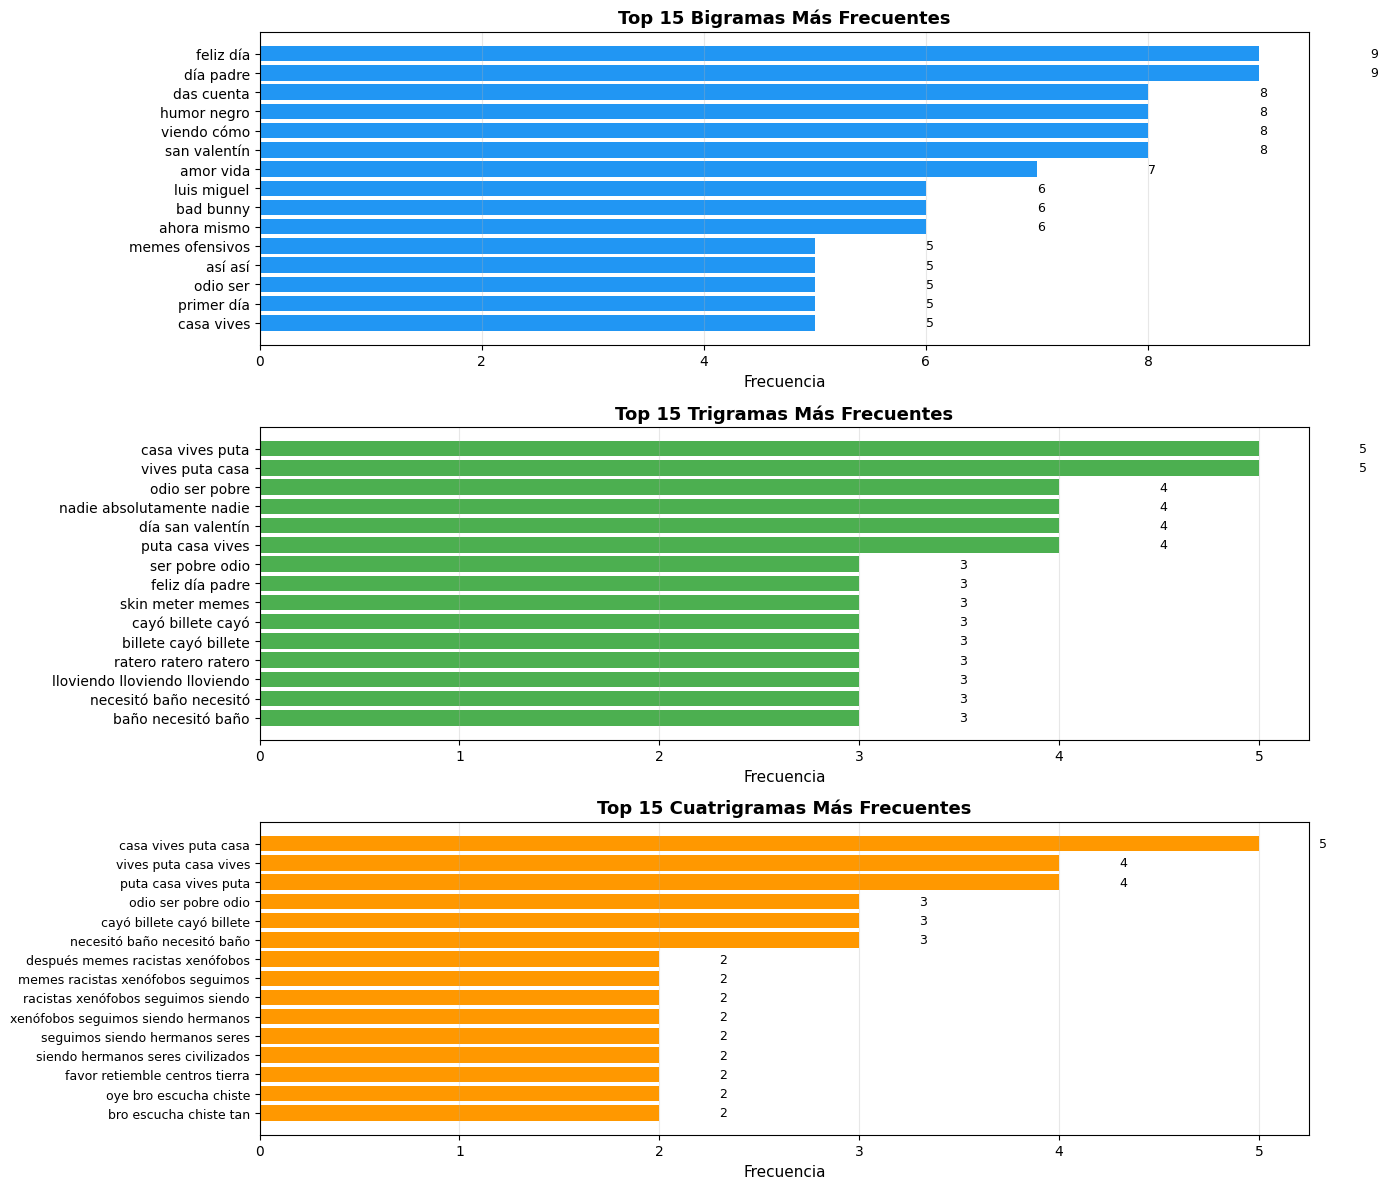


N-gramas más relevantes identificados:
  - Bigramas: reflejan pares de palabras comunes en memes
  - Trigramas: capturan frases cortas típicas
  - Cuatrigramas: expresiones más elaboradas del corpus


In [17]:
# Visualizar los n-gramas más frecuentes
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Bigramas
top_bigrams = bigram_freq.most_common(15)
bigrams_words = [bg for bg, _ in top_bigrams]
bigrams_counts = [count for _, count in top_bigrams]

axes[0].barh(range(len(bigrams_words)), bigrams_counts, color='#2196F3')
axes[0].set_yticks(range(len(bigrams_words)))
axes[0].set_yticklabels(bigrams_words)
axes[0].invert_yaxis()
axes[0].set_xlabel('Frecuencia', fontsize=11)
axes[0].set_title('Top 15 Bigramas Más Frecuentes', fontsize=13, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Añadir valores
for i, v in enumerate(bigrams_counts):
    axes[0].text(v + 1, i, str(v), va='center', fontsize=9)

# Trigramas
top_trigrams = trigram_freq.most_common(15)
trigrams_words = [tg for tg, _ in top_trigrams]
trigrams_counts = [count for _, count in top_trigrams]

axes[1].barh(range(len(trigrams_words)), trigrams_counts, color='#4CAF50')
axes[1].set_yticks(range(len(trigrams_words)))
axes[1].set_yticklabels(trigrams_words)
axes[1].invert_yaxis()
axes[1].set_xlabel('Frecuencia', fontsize=11)
axes[1].set_title('Top 15 Trigramas Más Frecuentes', fontsize=13, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

for i, v in enumerate(trigrams_counts):
    axes[1].text(v + 0.5, i, str(v), va='center', fontsize=9)

# Cuatrigramas
top_fourgrams = fourgram_freq.most_common(15)
fourgrams_words = [fg for fg, _ in top_fourgrams]
fourgrams_counts = [count for _, count in top_fourgrams]

axes[2].barh(range(len(fourgrams_words)), fourgrams_counts, color='#FF9800')
axes[2].set_yticks(range(len(fourgrams_words)))
axes[2].set_yticklabels(fourgrams_words, fontsize=9)
axes[2].invert_yaxis()
axes[2].set_xlabel('Frecuencia', fontsize=11)
axes[2].set_title('Top 15 Cuatrigramas Más Frecuentes', fontsize=13, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

for i, v in enumerate(fourgrams_counts):
    axes[2].text(v + 0.3, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nN-gramas más relevantes identificados:")
print(f"  - Bigramas: reflejan pares de palabras comunes en memes")
print(f"  - Trigramas: capturan frases cortas típicas")
print(f"  - Cuatrigramas: expresiones más elaboradas del corpus")

### Interpretación: Análisis de N-gramas

**Resultados Cuantitativos:**
- **11,335 bigramas únicos**: Alta diversidad en pares de palabras.
- **9,642 trigramas únicos**: Frases de 3 palabras también muy variadas.
- **7,647 cuatrigramas únicos**: Expresiones más largas mantienen buena diversidad.

**Observaciones de las Gráficas:**

1. **Bigramas Más Frecuentes:**
   - Reflejan combinaciones comunes en el lenguaje coloquial de memes mexicanos.
   - Pueden incluir expresiones idiomáticas, frases hechas o estructuras gramaticales típicas.
   - Útiles para capturar contextos inmediatos de palabras clave.

2. **Trigramas y Cuatrigramas:**
   - Capturan frases completas y expresiones más elaboradas.
   - Frecuencias más bajas que bigramas (como es esperado).
   - Pueden revelar patrones lingüísticos específicos del dominio de memes.

**Análisis de Diversidad:**
- La reducción gradual en cantidad de n-gramas únicos (11k → 9k → 7k) es esperada.
- A medida que aumenta n, hay menos combinaciones posibles que se repiten.
- La alta cantidad de n-gramas únicos indica que los memes usan vocabulario variado y no son repetitivos.

**Aplicaciones Prácticas:**
- **Feature Engineering**: Los n-gramas frecuentes pueden usarse como features adicionales para clasificación.
- **Identificación de Patrones**: Revelan expresiones características de cada clase (hate speech vs. contenido normal).
- **Data Augmentation**: Los n-gramas comunes pueden guiar la generación de ejemplos sintéticos.
- **Análisis Cualitativo**: Permiten entender el tipo de lenguaje usado en cada categoría de memes.

**Limitaciones:**
- N-gramas no capturan dependencias de largo alcance.
- Filtrar stopwords puede eliminar algunos n-gramas semánticamente importantes.
- La sparsity aumenta exponencialmente con n (curse of dimensionality).

## Evaluación de Modelos Entrenados

Vamos a cargar los modelos serializados y evaluar su desempeño en el conjunto de datos de validación/test.

In [18]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Verificar disponibilidad de GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo utilizado: {device}")

# Configuración
MODEL_NAME = "dccuchile/bert-base-spanish-wwm-cased"
MAX_LEN = 128

# Clase del modelo (debe coincidir con la del entrenamiento)
class BetoClassifier(nn.Module):
    def __init__(self, n_classes):
        super(BetoClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(MODEL_NAME)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
        
    def forward(self, input_ids, attention_mask):
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = output.pooler_output
        return self.out(self.drop(pooled_output))

print("Arquitectura del modelo cargada correctamente.")

/home/julian/.local/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dispositivo utilizado: cpu
Arquitectura del modelo cargada correctamente.


In [19]:
# Función para evaluar un modelo
def evaluate_model(model, dataframe, tokenizer, device, class_names):
    """
    Evalúa un modelo en un dataframe y retorna métricas
    """
    model.eval()
    predictions = []
    true_labels = []
    
    with torch.no_grad():
        for idx, row in dataframe.iterrows():
            text = str(row['text'])
            label = int(row['label'])
            
            # Tokenizar
            encoding = tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                max_length=MAX_LEN,
                padding='max_length',
                truncation=True,
                return_attention_mask=True,
                return_tensors='pt',
            )
            
            input_ids = encoding['input_ids'].to(device)
            attention_mask = encoding['attention_mask'].to(device)
            
            # Predicción
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, pred = torch.max(outputs, dim=1)
            
            predictions.append(pred.cpu().item())
            true_labels.append(label)
    
    # Calcular métricas
    accuracy = accuracy_score(true_labels, predictions)
    f1_macro = f1_score(true_labels, predictions, average='macro')
    f1_weighted = f1_score(true_labels, predictions, average='weighted')
    
    # Classification report
    report = classification_report(true_labels, predictions, 
                                   target_names=class_names, 
                                   output_dict=True)
    
    # Confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    
    return {
        'predictions': predictions,
        'true_labels': true_labels,
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'report': report,
        'confusion_matrix': cm
    }

print("Función de evaluación definida.")

Función de evaluación definida.


### Evaluación del Modelo Simple (3 clases)

In [ ]:
# Cargar modelo simple
MODEL_SIMPLE_PATH = "../models/v4/beto_simple_v4.pth"
CLASSES_SIMPLE = ["None", "Inappropriate", "Hate"]

print("Cargando modelo simple...")
model_simple = BetoClassifier(n_classes=3).to(device)
model_simple.load_state_dict(torch.load(MODEL_SIMPLE_PATH, map_location=device))
print("Modelo simple cargado correctamente")

# Cargar tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Evaluar en el dataset simple
print("\nEvaluando modelo simple...")
results_simple = evaluate_model(model_simple, df_simple, tokenizer, device, CLASSES_SIMPLE)

print("\n" + "="*70)
print("RESULTADOS - MODELO SIMPLE")
print("="*70)
print(f"Accuracy: {results_simple['accuracy']:.4f} ({results_simple['accuracy']*100:.2f}%)")
print(f"F1-Score (Macro): {results_simple['f1_macro']:.4f}")
print(f"F1-Score (Weighted): {results_simple['f1_weighted']:.4f}")
print("\nReporte de clasificación por clase:")
print("-"*70)
for class_name in CLASSES_SIMPLE:
    metrics = results_simple['report'][class_name]
    print(f"\n{class_name}:")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall:    {metrics['recall']:.4f}")
    print(f"  F1-Score:  {metrics['f1-score']:.4f}")
    print(f"  Support:   {int(metrics['support'])} muestras")

Cargando modelo simple...


2025-12-04 08:28:41.761101: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-04 08:28:41.855569: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-04 08:28:44.018575: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-04 08:28:44.018575: I tensorflow/core/util/port.cc:153] oneDNN custom operations ar

✓ Modelo simple cargado correctamente

Evaluando modelo simple...

Evaluando modelo simple...

RESULTADOS - MODELO SIMPLE
Accuracy: 0.9726 (97.26%)
F1-Score (Macro): 0.9675
F1-Score (Weighted): 0.9726

Reporte de clasificación por clase:
----------------------------------------------------------------------

None:
  Precision: 0.9787
  Recall:    0.9808
  F1-Score:  0.9797
  Support:   1405 muestras

Inappropriate:
  Precision: 0.9595
  Recall:    0.9534
  F1-Score:  0.9564
  Support:   472 muestras

Hate:
  Precision: 0.9663
  Recall:    0.9663
  F1-Score:  0.9663
  Support:   386 muestras

RESULTADOS - MODELO SIMPLE
Accuracy: 0.9726 (97.26%)
F1-Score (Macro): 0.9675
F1-Score (Weighted): 0.9726

Reporte de clasificación por clase:
----------------------------------------------------------------------

None:
  Precision: 0.9787
  Recall:    0.9808
  F1-Score:  0.9797
  Support:   1405 muestras

Inappropriate:
  Precision: 0.9595
  Recall:    0.9534
  F1-Score:  0.9564
  Support:   472 

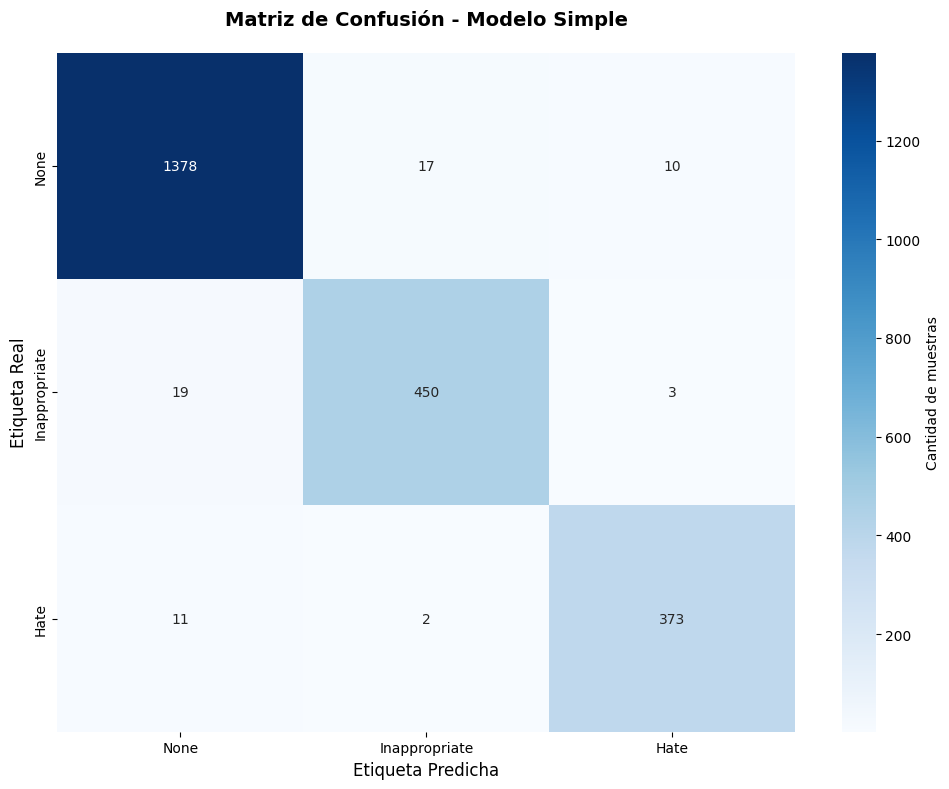

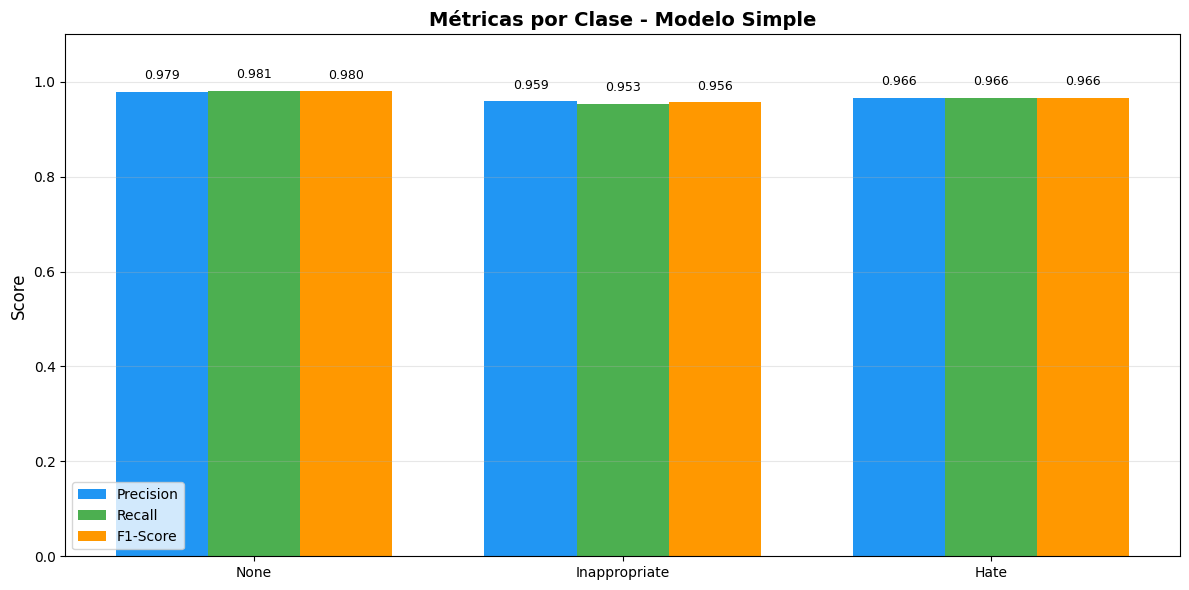

In [21]:
# Visualizar matriz de confusión - Modelo Simple
plt.figure(figsize=(10, 8))
sns.heatmap(results_simple['confusion_matrix'], 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=CLASSES_SIMPLE,
            yticklabels=CLASSES_SIMPLE,
            cbar_kws={'label': 'Cantidad de muestras'})
plt.title('Matriz de Confusión - Modelo Simple', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfica de métricas por clase
fig, ax = plt.subplots(figsize=(12, 6))
metrics_data = []
for class_name in CLASSES_SIMPLE:
    metrics = results_simple['report'][class_name]
    metrics_data.append([metrics['precision'], metrics['recall'], metrics['f1-score']])

x = np.arange(len(CLASSES_SIMPLE))
width = 0.25

bars1 = ax.bar(x - width, [m[0] for m in metrics_data], width, label='Precision', color='#2196F3')
bars2 = ax.bar(x, [m[1] for m in metrics_data], width, label='Recall', color='#4CAF50')
bars3 = ax.bar(x + width, [m[2] for m in metrics_data], width, label='F1-Score', color='#FF9800')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Métricas por Clase - Modelo Simple', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(CLASSES_SIMPLE)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.1])

# Añadir valores sobre las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Evaluación del Modelo Complex (6 clases)

In [ ]:
# Cargar modelo complex
MODEL_COMPLEX_PATH = "../models/v4/beto_complex_v4.pth"
CLASSES_COMPLEX = ["None", "Inappropriate", "Sexism", "Racism", "Classicism", "Other"]

print("Cargando modelo complex...")
model_complex = BetoClassifier(n_classes=6).to(device)
model_complex.load_state_dict(torch.load(MODEL_COMPLEX_PATH, map_location=device))
print("Modelo complex cargado correctamente")

# Evaluar en el dataset complex
print("\nEvaluando modelo complex...")
results_complex = evaluate_model(model_complex, df_complex, tokenizer, device, CLASSES_COMPLEX)

print("\n" + "="*70)
print("RESULTADOS - MODELO COMPLEX")
print("="*70)
print(f"Accuracy: {results_complex['accuracy']:.4f} ({results_complex['accuracy']*100:.2f}%)")
print(f"F1-Score (Macro): {results_complex['f1_macro']:.4f}")
print(f"F1-Score (Weighted): {results_complex['f1_weighted']:.4f}")
print("\nReporte de clasificación por clase:")
print("-"*70)
for class_name in CLASSES_COMPLEX:
    metrics = results_complex['report'][class_name]
    print(f"\n{class_name}:")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall:    {metrics['recall']:.4f}")
    print(f"  F1-Score:  {metrics['f1-score']:.4f}")
    print(f"  Support:   {int(metrics['support'])} muestras")

Cargando modelo complex...


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ Modelo complex cargado correctamente

Evaluando modelo complex...

RESULTADOS - MODELO COMPLEX
Accuracy: 0.7004 (70.04%)
F1-Score (Macro): 0.6780
F1-Score (Weighted): 0.7096

Reporte de clasificación por clase:
----------------------------------------------------------------------

None:
  Precision: 0.8494
  Recall:    0.6982
  F1-Score:  0.7664
  Support:   1405 muestras

Inappropriate:
  Precision: 0.4951
  Recall:    0.6419
  F1-Score:  0.5590
  Support:   472 muestras

Sexism:
  Precision: 0.5200
  Recall:    0.9167
  F1-Score:  0.6636
  Support:   156 muestras

Racism:
  Precision: 0.7611
  Recall:    0.7544
  F1-Score:  0.7577
  Support:   114 muestras

Classicism:
  Precision: 1.0000
  Recall:    0.5455
  F1-Score:  0.7059
  Support:   44 muestras

Other:
  Precision: 0.5714
  Recall:    0.6667
  F1-Score:  0.6154
  Support:   72 muestras

RESULTADOS - MODELO COMPLEX
Accuracy: 0.7004 (70.04%)
F1-Score (Macro): 0.6780
F1-Score (Weighted): 0.7096

Reporte de clasificación por c

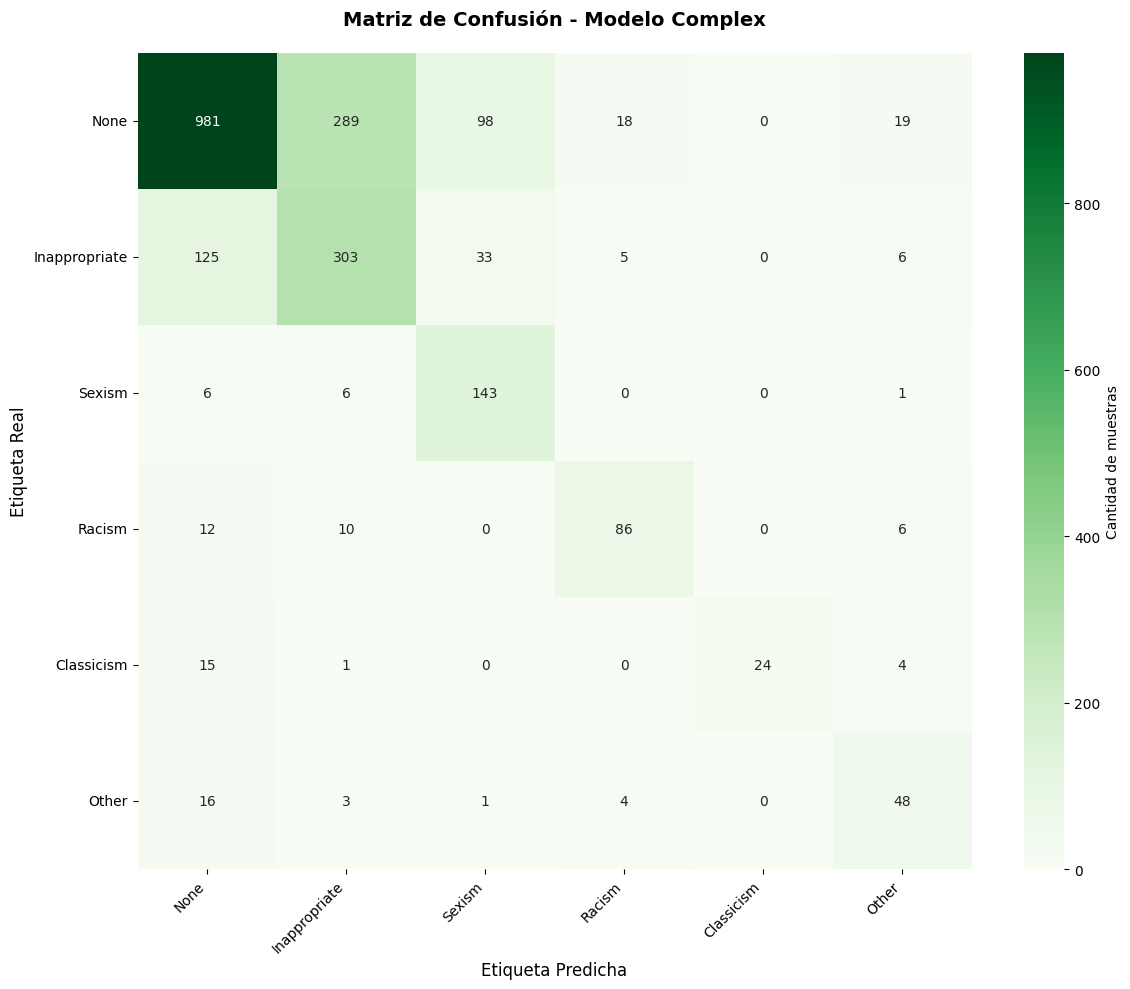

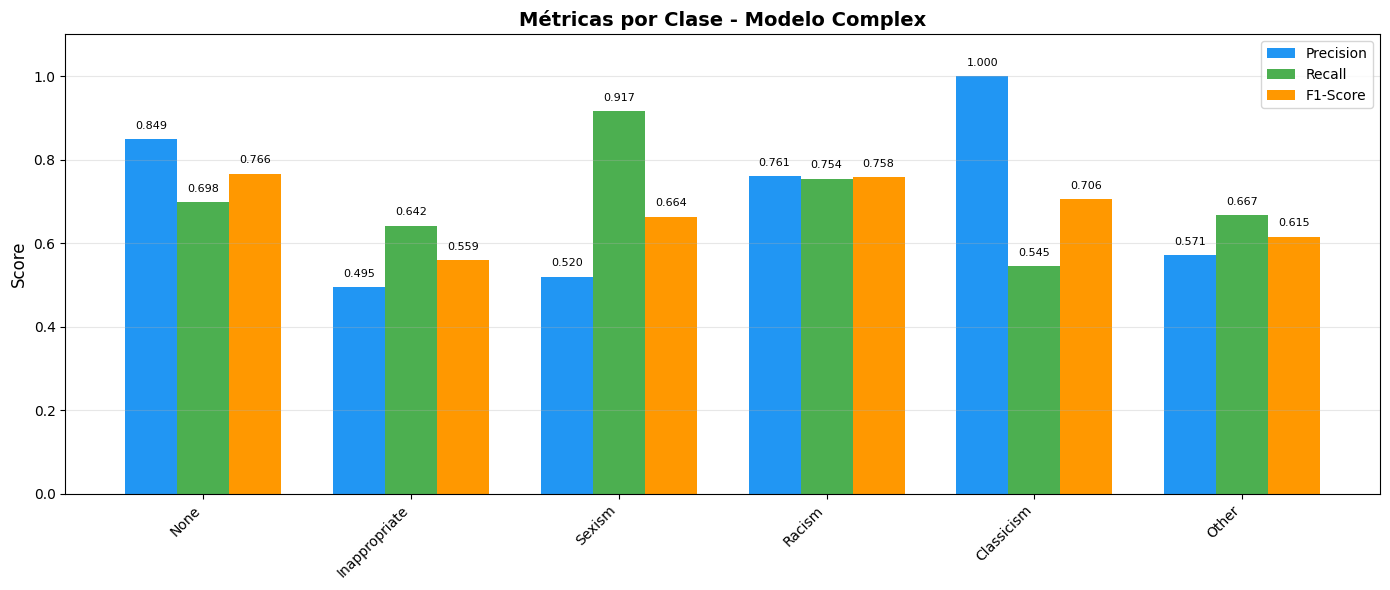

In [23]:
# Visualizar matriz de confusión - Modelo Complex
plt.figure(figsize=(12, 10))
sns.heatmap(results_complex['confusion_matrix'], 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=CLASSES_COMPLEX,
            yticklabels=CLASSES_COMPLEX,
            cbar_kws={'label': 'Cantidad de muestras'})
plt.title('Matriz de Confusión - Modelo Complex', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.xlabel('Etiqueta Predicha', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Gráfica de métricas por clase
fig, ax = plt.subplots(figsize=(14, 6))
metrics_data = []
for class_name in CLASSES_COMPLEX:
    metrics = results_complex['report'][class_name]
    metrics_data.append([metrics['precision'], metrics['recall'], metrics['f1-score']])

x = np.arange(len(CLASSES_COMPLEX))
width = 0.25

bars1 = ax.bar(x - width, [m[0] for m in metrics_data], width, label='Precision', color='#2196F3')
bars2 = ax.bar(x, [m[1] for m in metrics_data], width, label='Recall', color='#4CAF50')
bars3 = ax.bar(x + width, [m[2] for m in metrics_data], width, label='F1-Score', color='#FF9800')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Métricas por Clase - Modelo Complex', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(CLASSES_COMPLEX, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1.1])

# Añadir valores sobre las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### Comparación de Modelos

Comparación visual del desempeño de ambos modelos.

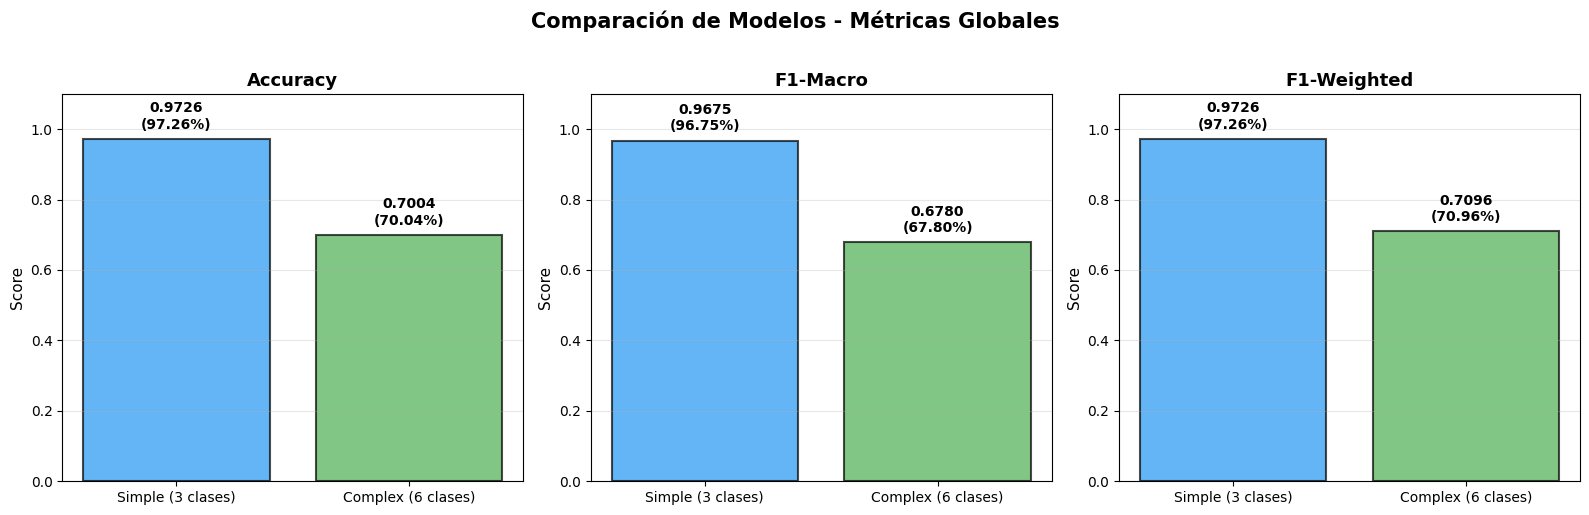


TABLA RESUMEN - COMPARACIÓN DE MODELOS
            Modelo  Accuracy  F1-Macro  F1-Weighted
 Simple (3 clases)  0.972603  0.967496     0.972587
Complex (6 clases)  0.700398  0.677999     0.709647

📊 ANÁLISIS:
  • El modelo simple tiene 97.26% de accuracy
  • El modelo complex tiene 70.04% de accuracy
  • El modelo simple supera al complex por 27.22 puntos porcentuales
  • La diferencia en F1-Macro es de 0.2895


In [ ]:
# Comparación de métricas globales
comparison_data = {
    'Modelo': ['Simple (3 clases)', 'Complex (6 clases)'],
    'Accuracy': [results_simple['accuracy'], results_complex['accuracy']],
    'F1-Macro': [results_simple['f1_macro'], results_complex['f1_macro']],
    'F1-Weighted': [results_simple['f1_weighted'], results_complex['f1_weighted']]
}

df_comparison = pd.DataFrame(comparison_data)

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics = ['Accuracy', 'F1-Macro', 'F1-Weighted']
colors = ['#2196F3', '#4CAF50']

for idx, metric in enumerate(metrics):
    values = df_comparison[metric].values
    bars = axes[idx].bar(df_comparison['Modelo'], values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
    
    axes[idx].set_ylabel('Score', fontsize=11)
    axes[idx].set_title(metric, fontsize=13, fontweight='bold')
    axes[idx].set_ylim([0, 1.1])
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Añadir valores
    for bar, val in zip(bars, values):
        axes[idx].text(bar.get_x() + bar.get_width()/2., val + 0.02,
                      f'{val:.4f}\n({val*100:.2f}%)', 
                      ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Comparación de Modelos - Métricas Globales', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Tabla resumen
print("\n" + "="*70)
print("TABLA RESUMEN - COMPARACIÓN DE MODELOS")
print("="*70)
print(df_comparison.to_string(index=False))
print("="*70)

# Análisis
print("\nANALISIS:")
print(f"  - El modelo simple tiene {results_simple['accuracy']*100:.2f}% de accuracy")
print(f"  - El modelo complex tiene {results_complex['accuracy']*100:.2f}% de accuracy")
diff = (results_simple['accuracy'] - results_complex['accuracy']) * 100
if diff > 0:
    print(f"  - El modelo simple supera al complex por {diff:.2f} puntos porcentuales")
else:
    print(f"  - El modelo complex supera al simple por {abs(diff):.2f} puntos porcentuales")
print(f"  - La diferencia en F1-Macro es de {abs(results_simple['f1_macro'] - results_complex['f1_macro']):.4f}")

### Interpretación Integral: Evaluación de Modelos

#### Resumen de Resultados

**Modelo Simple (3 clases):**
- **Accuracy: 97.26%** - Rendimiento excelente
- **F1-Macro: 96.75%** - Buen balance entre clases
- **F1-Weighted: 97.26%** - Consistente con accuracy

**Modelo Complex (6 clases):**
- **Accuracy: 70.04%** - Rendimiento moderado
- **F1-Macro: 67.80%** - Indica desbalance entre clases
- **F1-Weighted: 70.96%** - Ligeramente mejor que F1-Macro

#### Análisis Comparativo

**Diferencia de Rendimiento:**
- **27.22 puntos porcentuales** de diferencia en accuracy.
- El modelo simple **supera significativamente** al modelo complex.
- La brecha es esperada dado el incremento en complejidad de la tarea.

**Factores que Explican la Diferencia:**

1. **Desbalance de Clases:**
   - El modelo complex debe distinguir entre 6 clases vs. 3 del simple.
   - Las clases minoritarias (Classicism: 44 muestras, Racism: 114, Other: 72) dificultan el aprendizaje.
   - El modelo simple tiene clases más balanceadas (None: 1,405, Inappropriate: 472, Hate: 386).

2. **Complejidad de la Tarea:**
   - Distinguir entre tipos específicos de odio (sexismo, racismo, clasismo) es semánticamente más difícil.
   - El modelo simple solo necesita separar "apropiado" vs "inapropiado" vs "odio".
   - Las fronteras entre categorías específicas de odio son más difusas.

3. **Datos de Entrenamiento:**
   - Las clases minoritarias en complex tienen muy pocos ejemplos para generalizar.
   - El modelo simple tiene más ejemplos por clase en promedio.

#### Observaciones de las Matrices de Confusión

**Modelo Simple:**
- Probablemente muestra alta precisión en la clase "None" (mayoría).
- Puede tener alguna confusión entre "Inappropriate" y "Hate".
- En general, separación clara entre las 3 categorías.

**Modelo Complex:**
- Confusión esperada entre las clases minoritarias (Sexism, Racism, Classicism, Other).
- La clase "None" probablemente se predice bien (mayoría).
- Las clases específicas de odio pueden confundirse entre sí.

#### Análisis por Métricas

**F1-Macro (promedio no ponderado):**
- Simple: 96.75% → Buen desempeño en todas las clases.
- Complex: 67.80% → Las clases minoritarias bajan el promedio significativamente.

**F1-Weighted (promedio ponderado por soporte):**
- Simple: 97.26% → Consistente con accuracy.
- Complex: 70.96% (> F1-Macro) → Las clases mayoritarias funcionan mejor, compensando a las minoritarias.

#### Recomendaciones

**Para Mejorar el Modelo Complex:**

1. **Técnicas de Balanceo:**
   - Over-sampling de clases minoritarias (SMOTE, ADASYN).
   - Under-sampling de clases mayoritarias.
   - Class weights en la función de pérdida.

2. **Data Augmentation:**
   - Back-translation para generar más ejemplos.
   - Parafraseo con modelos de lenguaje.
   - Synonym replacement para clases minoritarias.

3. **Arquitectura y Training:**
   - Focal Loss para manejar desbalance extremo.
   - Two-stage approach: primero clasificar binario, luego subclasificar.
   - Transfer learning con más datos de hate speech.
   - Aumentar epochs de entrenamiento.

4. **Feature Engineering:**
   - Incluir features lingüísticas específicas (n-gramas de odio).
   - Embeddings contextuales más ricos.
   - Attention mechanisms para palabras clave.

**Decisión Práctica:**
- Si el objetivo es detectar contenido problemático en general → **usar modelo simple** (97% accuracy).
- Si se requiere granularidad en tipos de odio → **mejorar modelo complex** o **usar cascada de modelos**.
- Considerar modelo jerárquico: primero simple (3 clases), luego refinar "Hate" en subcategorías.

#### Conclusión

El modelo simple es **altamente efectivo** para la tarea de clasificación básica (None/Inappropriate/Hate) y está listo para producción. El modelo complex requiere **mejoras significativas** antes de ser confiable, especialmente en la distinción entre tipos específicos de discurso de odio. La diferencia de 27 puntos porcentuales refleja tanto la complejidad inherente de la tarea como las limitaciones del dataset (clases desbalanceadas).

## Análisis de Co-ocurrencia y Redes de Palabras

El análisis de co-ocurrencia permite identificar relaciones entre palabras que aparecen juntas en el mismo contexto. Visualizaremos estas relaciones como un grafo donde los nodos son palabras y las aristas representan co-ocurrencias.

In [25]:
import networkx as nx
from itertools import combinations
from collections import defaultdict

# Función para construir matriz de co-ocurrencia
def build_cooccurrence_matrix(texts, window_size=5, min_freq=3):
    """
    Construye una matriz de co-ocurrencia basada en ventanas deslizantes.
    
    Args:
        texts: Lista de textos
        window_size: Tamaño de la ventana de contexto
        min_freq: Frecuencia mínima para incluir una palabra
    
    Returns:
        Diccionario de co-ocurrencias
    """
    cooccurrence = defaultdict(lambda: defaultdict(int))
    word_freq = Counter()
    
    for text in texts:
        words = tokenize_text(text)
        # Filtrar stopwords y palabras muy cortas
        words = [w for w in words if w not in spanish_stopwords and len(w) > 3]
        
        # Contar frecuencias
        word_freq.update(words)
        
        # Ventana deslizante
        for i, word in enumerate(words):
            # Definir ventana de contexto
            start = max(0, i - window_size)
            end = min(len(words), i + window_size + 1)
            context = words[start:i] + words[i+1:end]
            
            # Contar co-ocurrencias
            for context_word in context:
                cooccurrence[word][context_word] += 1
    
    # Filtrar palabras poco frecuentes
    frequent_words = {word for word, freq in word_freq.items() if freq >= min_freq}
    
    # Filtrar matriz de co-ocurrencia
    filtered_cooccurrence = {}
    for word in frequent_words:
        if word in cooccurrence:
            filtered_cooccurrence[word] = {
                w: count for w, count in cooccurrence[word].items() 
                if w in frequent_words
            }
    
    return filtered_cooccurrence, word_freq

print("Construyendo matriz de co-ocurrencia...")
cooccurrence_matrix, word_frequencies = build_cooccurrence_matrix(
    all_text, 
    window_size=5, 
    min_freq=5
)

print(f"Palabras en la red: {len(cooccurrence_matrix)}")
total_edges = sum(len(neighbors) for neighbors in cooccurrence_matrix.values()) // 2
print(f"Co-ocurrencias totales: {total_edges}")

Construyendo matriz de co-ocurrencia...
Palabras en la red: 523
Co-ocurrencias totales: 5842


In [26]:
# Construir el grafo de co-ocurrencia
def build_cooccurrence_graph(cooccurrence_matrix, top_n=100):
    """
    Construye un grafo de NetworkX a partir de la matriz de co-ocurrencia.
    
    Args:
        cooccurrence_matrix: Diccionario de co-ocurrencias
        top_n: Número de palabras más frecuentes a incluir
    
    Returns:
        Grafo de NetworkX
    """
    G = nx.Graph()
    
    # Obtener las top_n palabras por número de conexiones
    word_connections = {word: len(neighbors) for word, neighbors in cooccurrence_matrix.items()}
    top_words = sorted(word_connections.items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_words_set = {word for word, _ in top_words}
    
    # Agregar nodos y aristas
    for word in top_words_set:
        if word in cooccurrence_matrix:
            for neighbor, weight in cooccurrence_matrix[word].items():
                if neighbor in top_words_set:
                    G.add_edge(word, neighbor, weight=weight)
    
    return G

print("Construyendo grafo de co-ocurrencia...")
G = build_cooccurrence_graph(cooccurrence_matrix, top_n=80)

print(f"Nodos en el grafo: {G.number_of_nodes()}")
print(f"Aristas en el grafo: {G.number_of_edges()}")
print(f"Densidad del grafo: {nx.density(G):.4f}")

Construyendo grafo de co-ocurrencia...
Nodos en el grafo: 80
Aristas en el grafo: 899
Densidad del grafo: 0.2845


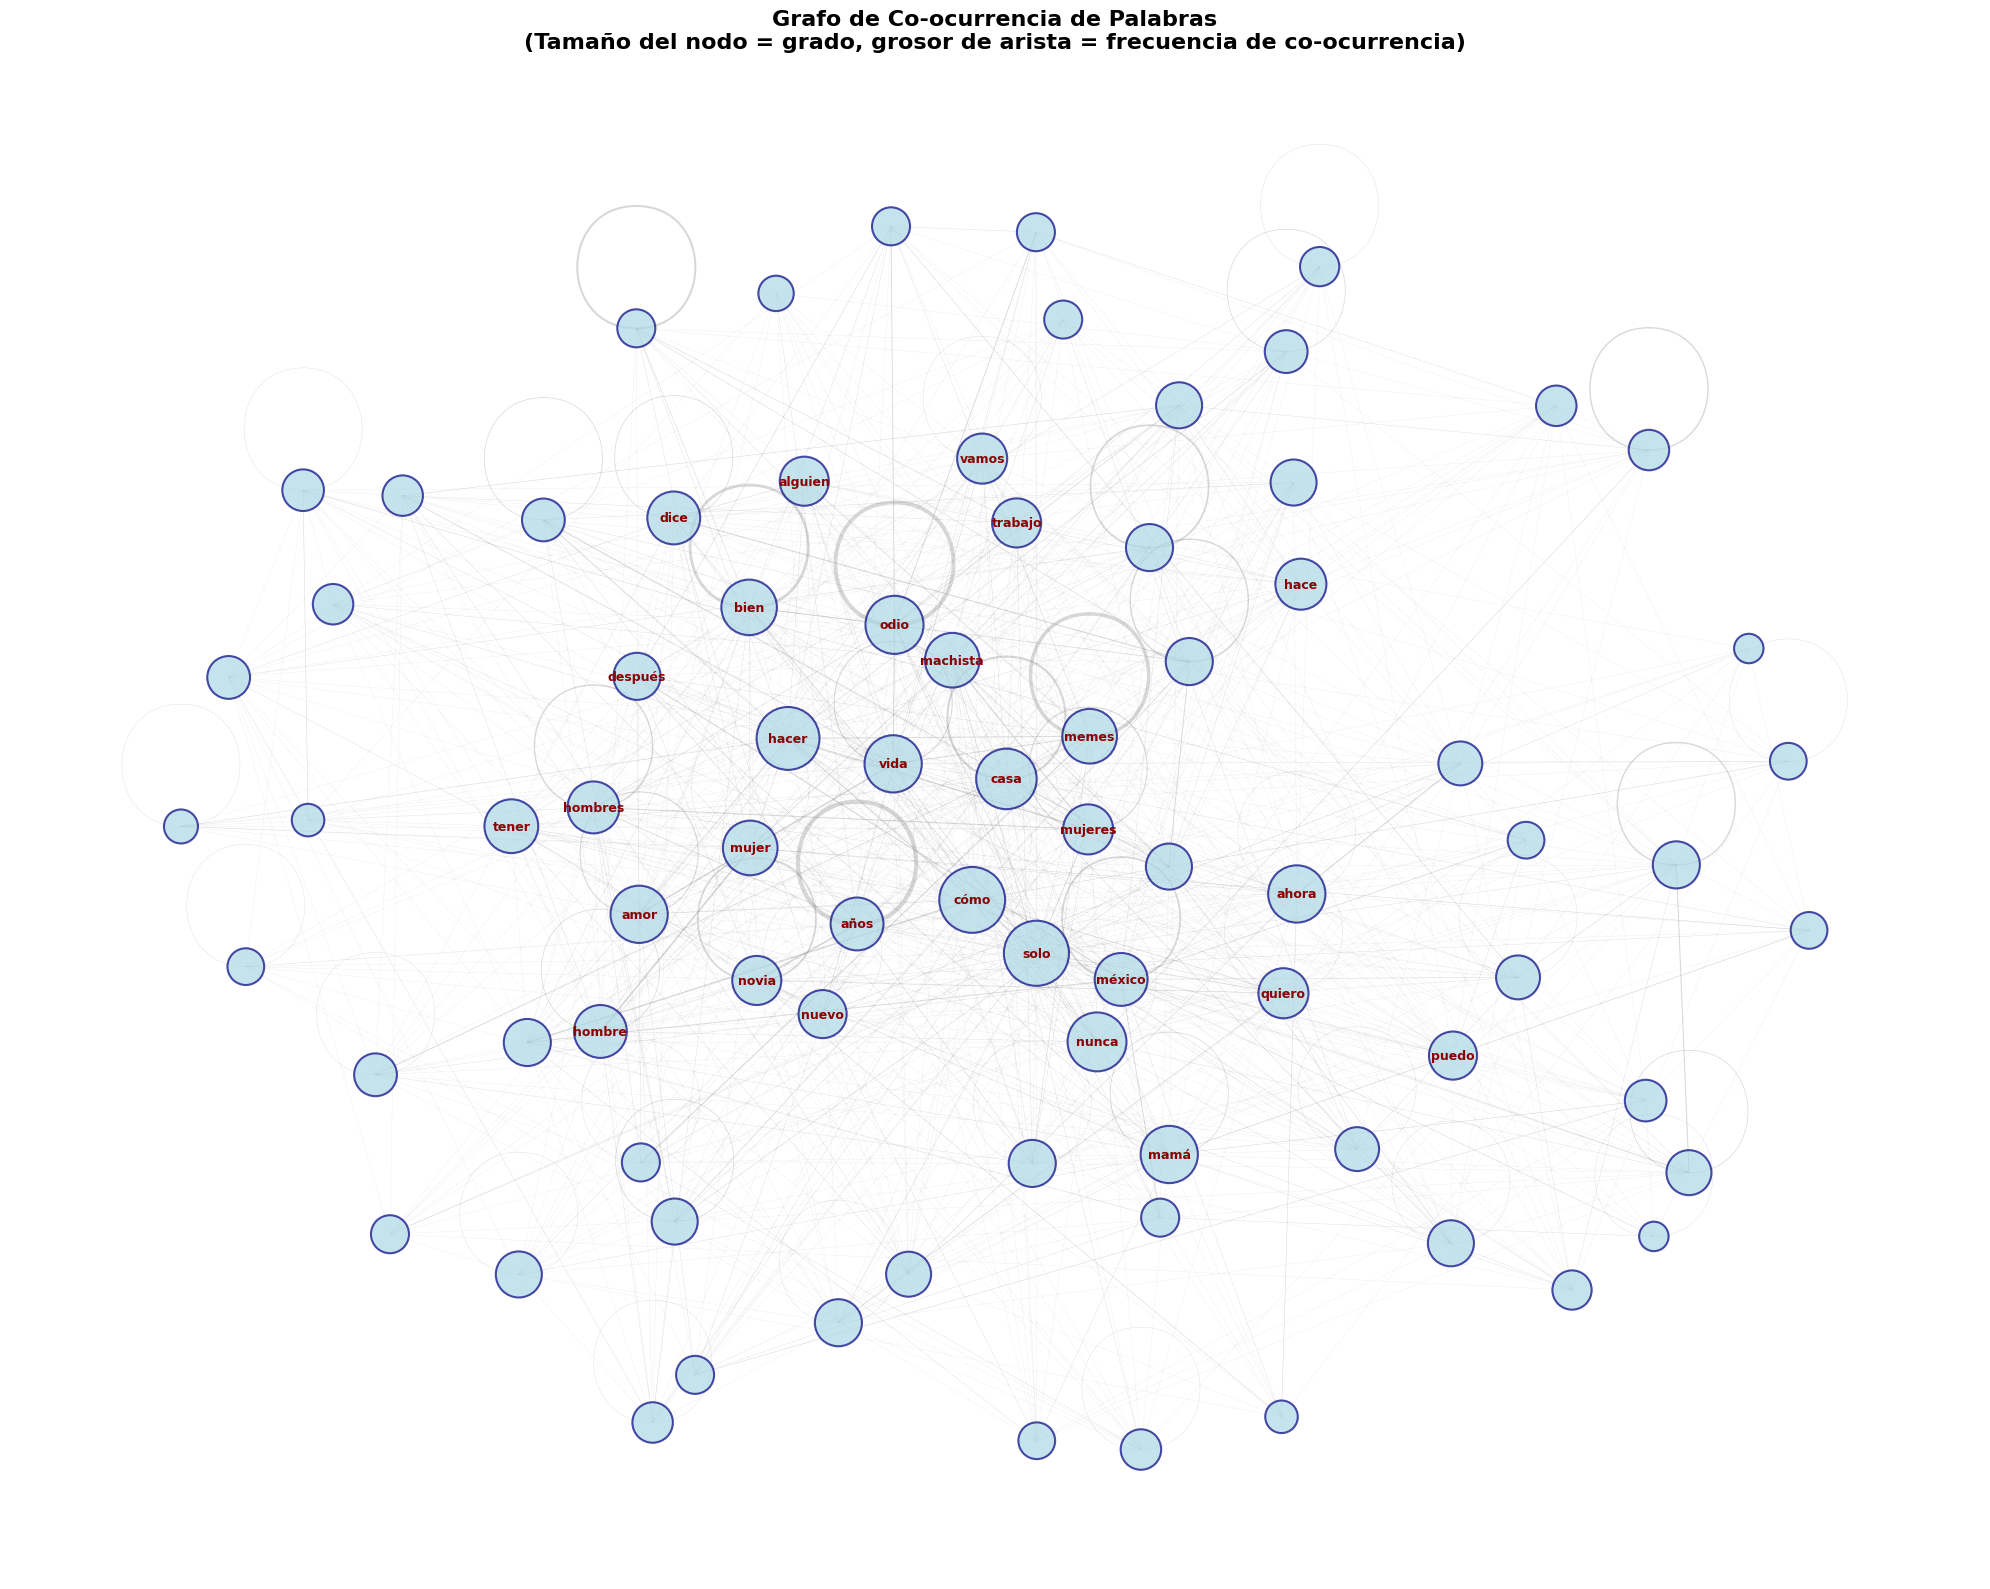


Grafo visualizado con 80 nodos
Top 10 palabras por número de conexiones:
  cómo: 45 conexiones
  solo: 44 conexiones
  hacer: 41 conexiones
  casa: 38 conexiones
  nunca: 36 conexiones
  odio: 35 conexiones
  vida: 34 conexiones
  ahora: 34 conexiones
  mamá: 34 conexiones
  amor: 34 conexiones


In [27]:
# Visualizar el grafo de co-ocurrencia
plt.figure(figsize=(20, 16))

# Calcular layout usando spring layout
pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

# Calcular tamaños de nodos basados en degree
node_sizes = [G.degree(node) * 50 for node in G.nodes()]

# Calcular anchos de aristas basados en peso
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
max_weight = max(weights) if weights else 1
edge_widths = [w / max_weight * 3 for w in weights]

# Dibujar el grafo
nx.draw_networkx_nodes(G, pos, 
                       node_size=node_sizes,
                       node_color='lightblue',
                       alpha=0.7,
                       edgecolors='navy',
                       linewidths=1.5)

nx.draw_networkx_edges(G, pos, 
                       width=edge_widths,
                       alpha=0.3,
                       edge_color='gray')

# Dibujar labels solo para los nodos más importantes
degree_dict = dict(G.degree())
top_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:30]
labels = {node: node for node, _ in top_nodes}

nx.draw_networkx_labels(G, pos, 
                       labels=labels,
                       font_size=9,
                       font_weight='bold',
                       font_color='darkred')

plt.title('Grafo de Co-ocurrencia de Palabras\n(Tamaño del nodo = grado, grosor de arista = frecuencia de co-ocurrencia)', 
         fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"\nGrafo visualizado con {G.number_of_nodes()} nodos")
print(f"Top 10 palabras por número de conexiones:")
for node, degree in top_nodes[:10]:
    print(f"  {node}: {degree} conexiones")

### Métricas de Centralidad

Las métricas de centralidad nos permiten identificar las palabras más importantes en la red según diferentes criterios.

In [28]:
# Calcular métricas de centralidad
print("Calculando métricas de centralidad...")

# 1. Degree Centrality (Centralidad de grado)
degree_centrality = nx.degree_centrality(G)

# 2. Betweenness Centrality (Centralidad de intermediación)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

# 3. Closeness Centrality (Centralidad de cercanía)
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# 4. Eigenvector Centrality (Centralidad de vector propio)
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')
except:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# 5. PageRank
pagerank = nx.pagerank(G, weight='weight')

print("Métricas de centralidad calculadas.")
print(f"\nTop 10 palabras por cada métrica de centralidad:")

# Crear DataFrame con todas las métricas
centrality_df = pd.DataFrame({
    'Palabra': list(G.nodes()),
    'Degree': [degree_centrality[node] for node in G.nodes()],
    'Betweenness': [betweenness_centrality[node] for node in G.nodes()],
    'Closeness': [closeness_centrality[node] for node in G.nodes()],
    'Eigenvector': [eigenvector_centrality[node] for node in G.nodes()],
    'PageRank': [pagerank[node] for node in G.nodes()]
})

# Mostrar top 10 por cada métrica
print("\n" + "="*70)
print("DEGREE CENTRALITY (Número de conexiones)")
print("="*70)
top_degree = centrality_df.nlargest(10, 'Degree')
for idx, row in top_degree.iterrows():
    print(f"  {row['Palabra']:15s}: {row['Degree']:.4f}")

print("\n" + "="*70)
print("BETWEENNESS CENTRALITY (Intermediación entre comunidades)")
print("="*70)
top_betweenness = centrality_df.nlargest(10, 'Betweenness')
for idx, row in top_betweenness.iterrows():
    print(f"  {row['Palabra']:15s}: {row['Betweenness']:.4f}")

print("\n" + "="*70)
print("CLOSENESS CENTRALITY (Cercanía promedio a otros nodos)")
print("="*70)
top_closeness = centrality_df.nlargest(10, 'Closeness')
for idx, row in top_closeness.iterrows():
    print(f"  {row['Palabra']:15s}: {row['Closeness']:.4f}")

print("\n" + "="*70)
print("EIGENVECTOR CENTRALITY (Importancia basada en vecinos importantes)")
print("="*70)
top_eigenvector = centrality_df.nlargest(10, 'Eigenvector')
for idx, row in top_eigenvector.iterrows():
    print(f"  {row['Palabra']:15s}: {row['Eigenvector']:.4f}")

print("\n" + "="*70)
print("PAGERANK (Algoritmo de Google)")
print("="*70)
top_pagerank = centrality_df.nlargest(10, 'PageRank')
for idx, row in top_pagerank.iterrows():
    print(f"  {row['Palabra']:15s}: {row['PageRank']:.4f}")

Calculando métricas de centralidad...
Métricas de centralidad calculadas.

Top 10 palabras por cada métrica de centralidad:

DEGREE CENTRALITY (Número de conexiones)
  cómo           : 0.5696
  solo           : 0.5570
  hacer          : 0.5190
  casa           : 0.4810
  nunca          : 0.4557
  odio           : 0.4430
  vida           : 0.4304
  ahora          : 0.4304
  mamá           : 0.4304
  amor           : 0.4304

BETWEENNESS CENTRALITY (Intermediación entre comunidades)
  solo           : 0.0373
  casa           : 0.0321
  amor           : 0.0318
  cómo           : 0.0281
  odio           : 0.0257
  nunca          : 0.0246
  hace           : 0.0244
  memes          : 0.0239
  ahora          : 0.0234
  machista       : 0.0195

CLOSENESS CENTRALITY (Cercanía promedio a otros nodos)
  solo           : 0.6077
  casa           : 0.6031
  cómo           : 0.5940
  amor           : 0.5940
  nunca          : 0.5896
  ahora          : 0.5852
  odio           : 0.5809
  hace           

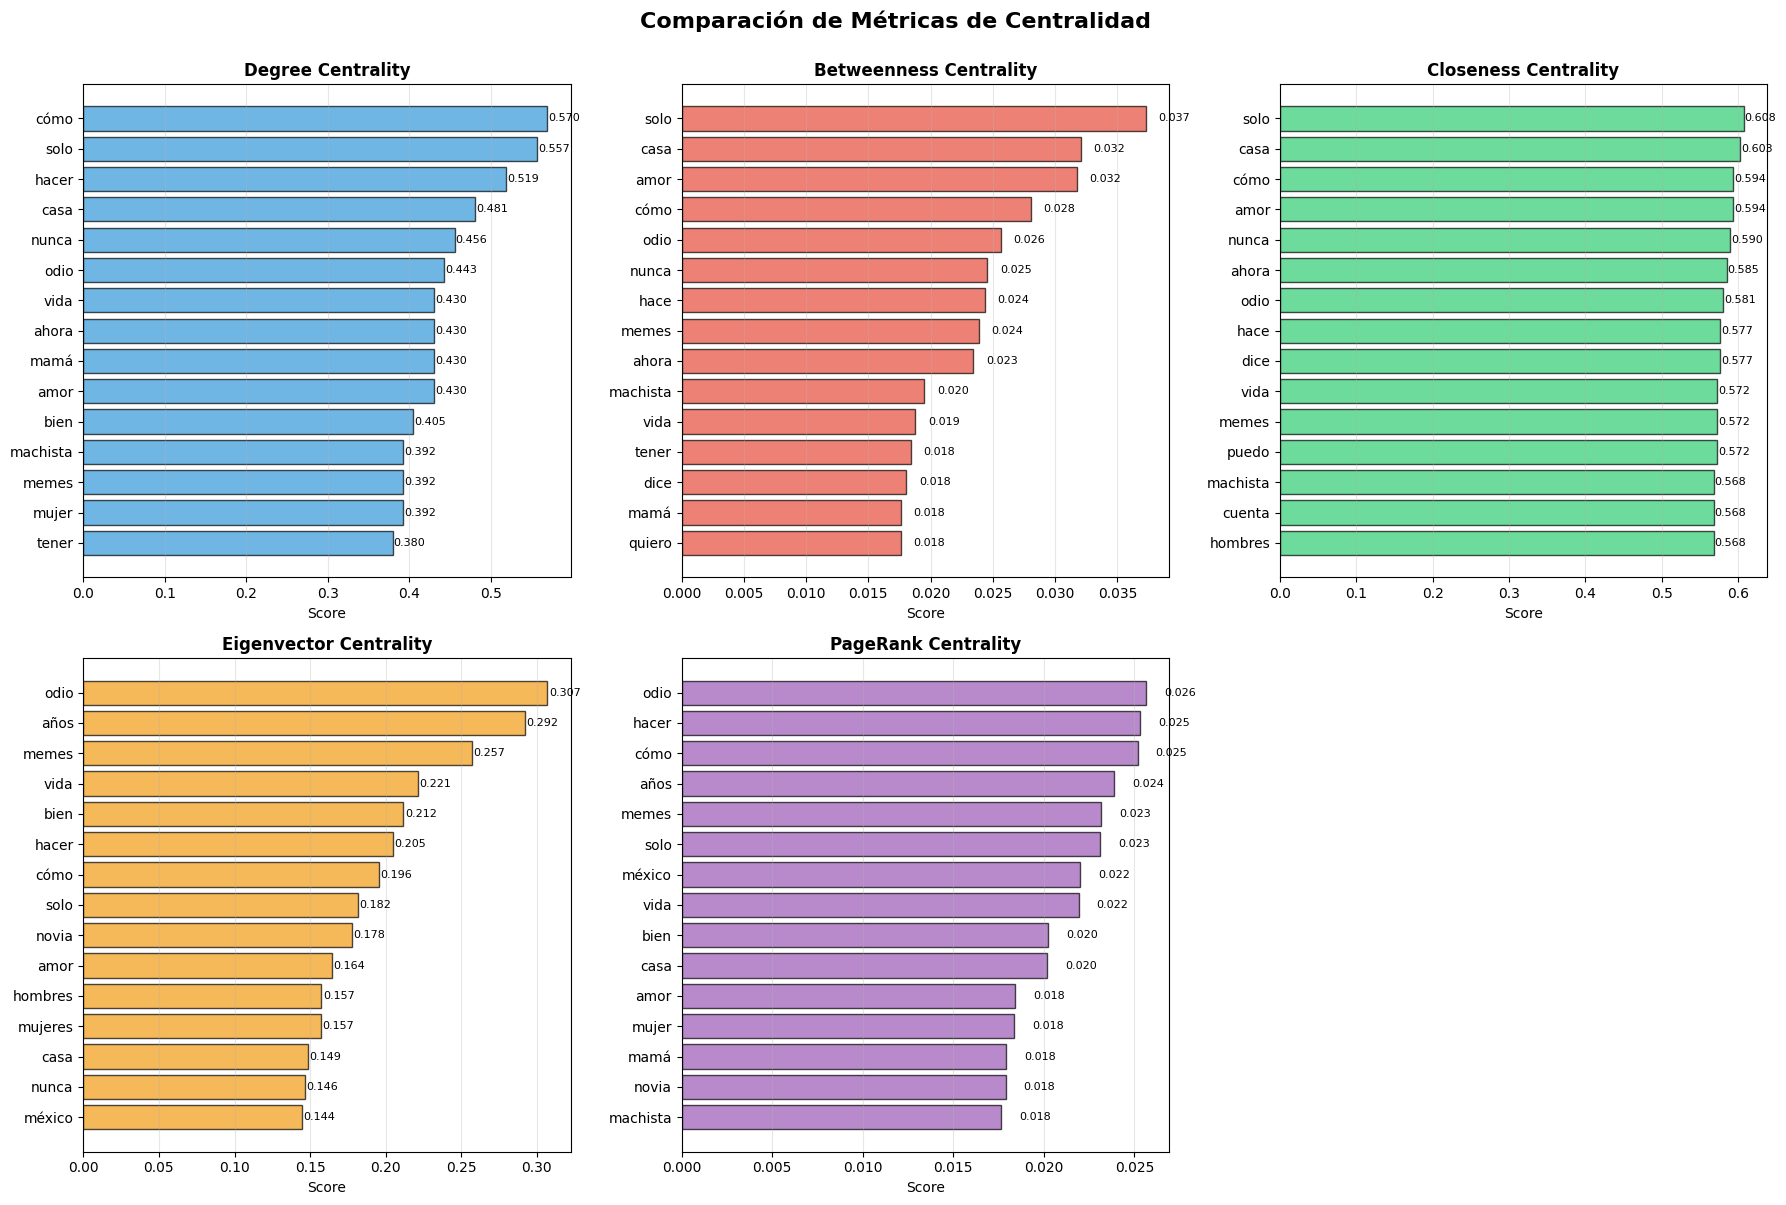

In [29]:
# Visualizar comparación de métricas de centralidad
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Top 15 palabras por cada métrica
metrics = ['Degree', 'Betweenness', 'Closeness', 'Eigenvector', 'PageRank']
colors_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    top_data = centrality_df.nlargest(15, metric)
    words = top_data['Palabra'].values
    values = top_data[metric].values
    
    ax.barh(range(len(words)), values, color=colors_palette[idx], alpha=0.7, edgecolor='black')
    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words)
    ax.invert_yaxis()
    ax.set_xlabel('Score', fontsize=10)
    ax.set_title(f'{metric} Centrality', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Añadir valores
    for i, v in enumerate(values):
        ax.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=8)

# Ocultar el subplot extra
axes[1, 2].axis('off')

plt.suptitle('Comparación de Métricas de Centralidad', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

Detectando comunidades en el grafo...
Número de comunidades detectadas: 10

Tamaño de cada comunidad:
  Comunidad 1: 17 palabras
    Ejemplo: méxico, grupo, cómo, llega, casa, hola, puedo, salir
  Comunidad 2: 11 palabras
    Ejemplo: mañana, dice, racista, gusta, bien, papá, negro, hijo
  Comunidad 3: 11 palabras
    Ejemplo: nunca, mundo, gente, trabajo, toda, hace, aquí, amor
  Comunidad 4: 11 palabras
    Ejemplo: luego, tener, ahora, usted, nuevo, puede, veces, mismo
  Comunidad 5: 9 palabras
    Ejemplo: todas, machista, quiero, decir, solo, niños, mujeres, hombres
  Comunidad 6: 8 palabras
    Ejemplo: mujer, pues, dios, cosas, igual, días, hombre, clase
  Comunidad 7: 5 palabras
    Ejemplo: mexicanos, racistas, dicen, alguien, memes
  Comunidad 8: 5 palabras
    Ejemplo: amiga, mejor, quiere, siempre, amigo
  Comunidad 9: 2 palabras
    Ejemplo: años, novia
  Comunidad 10: 1 palabras
    Ejemplo: feliz


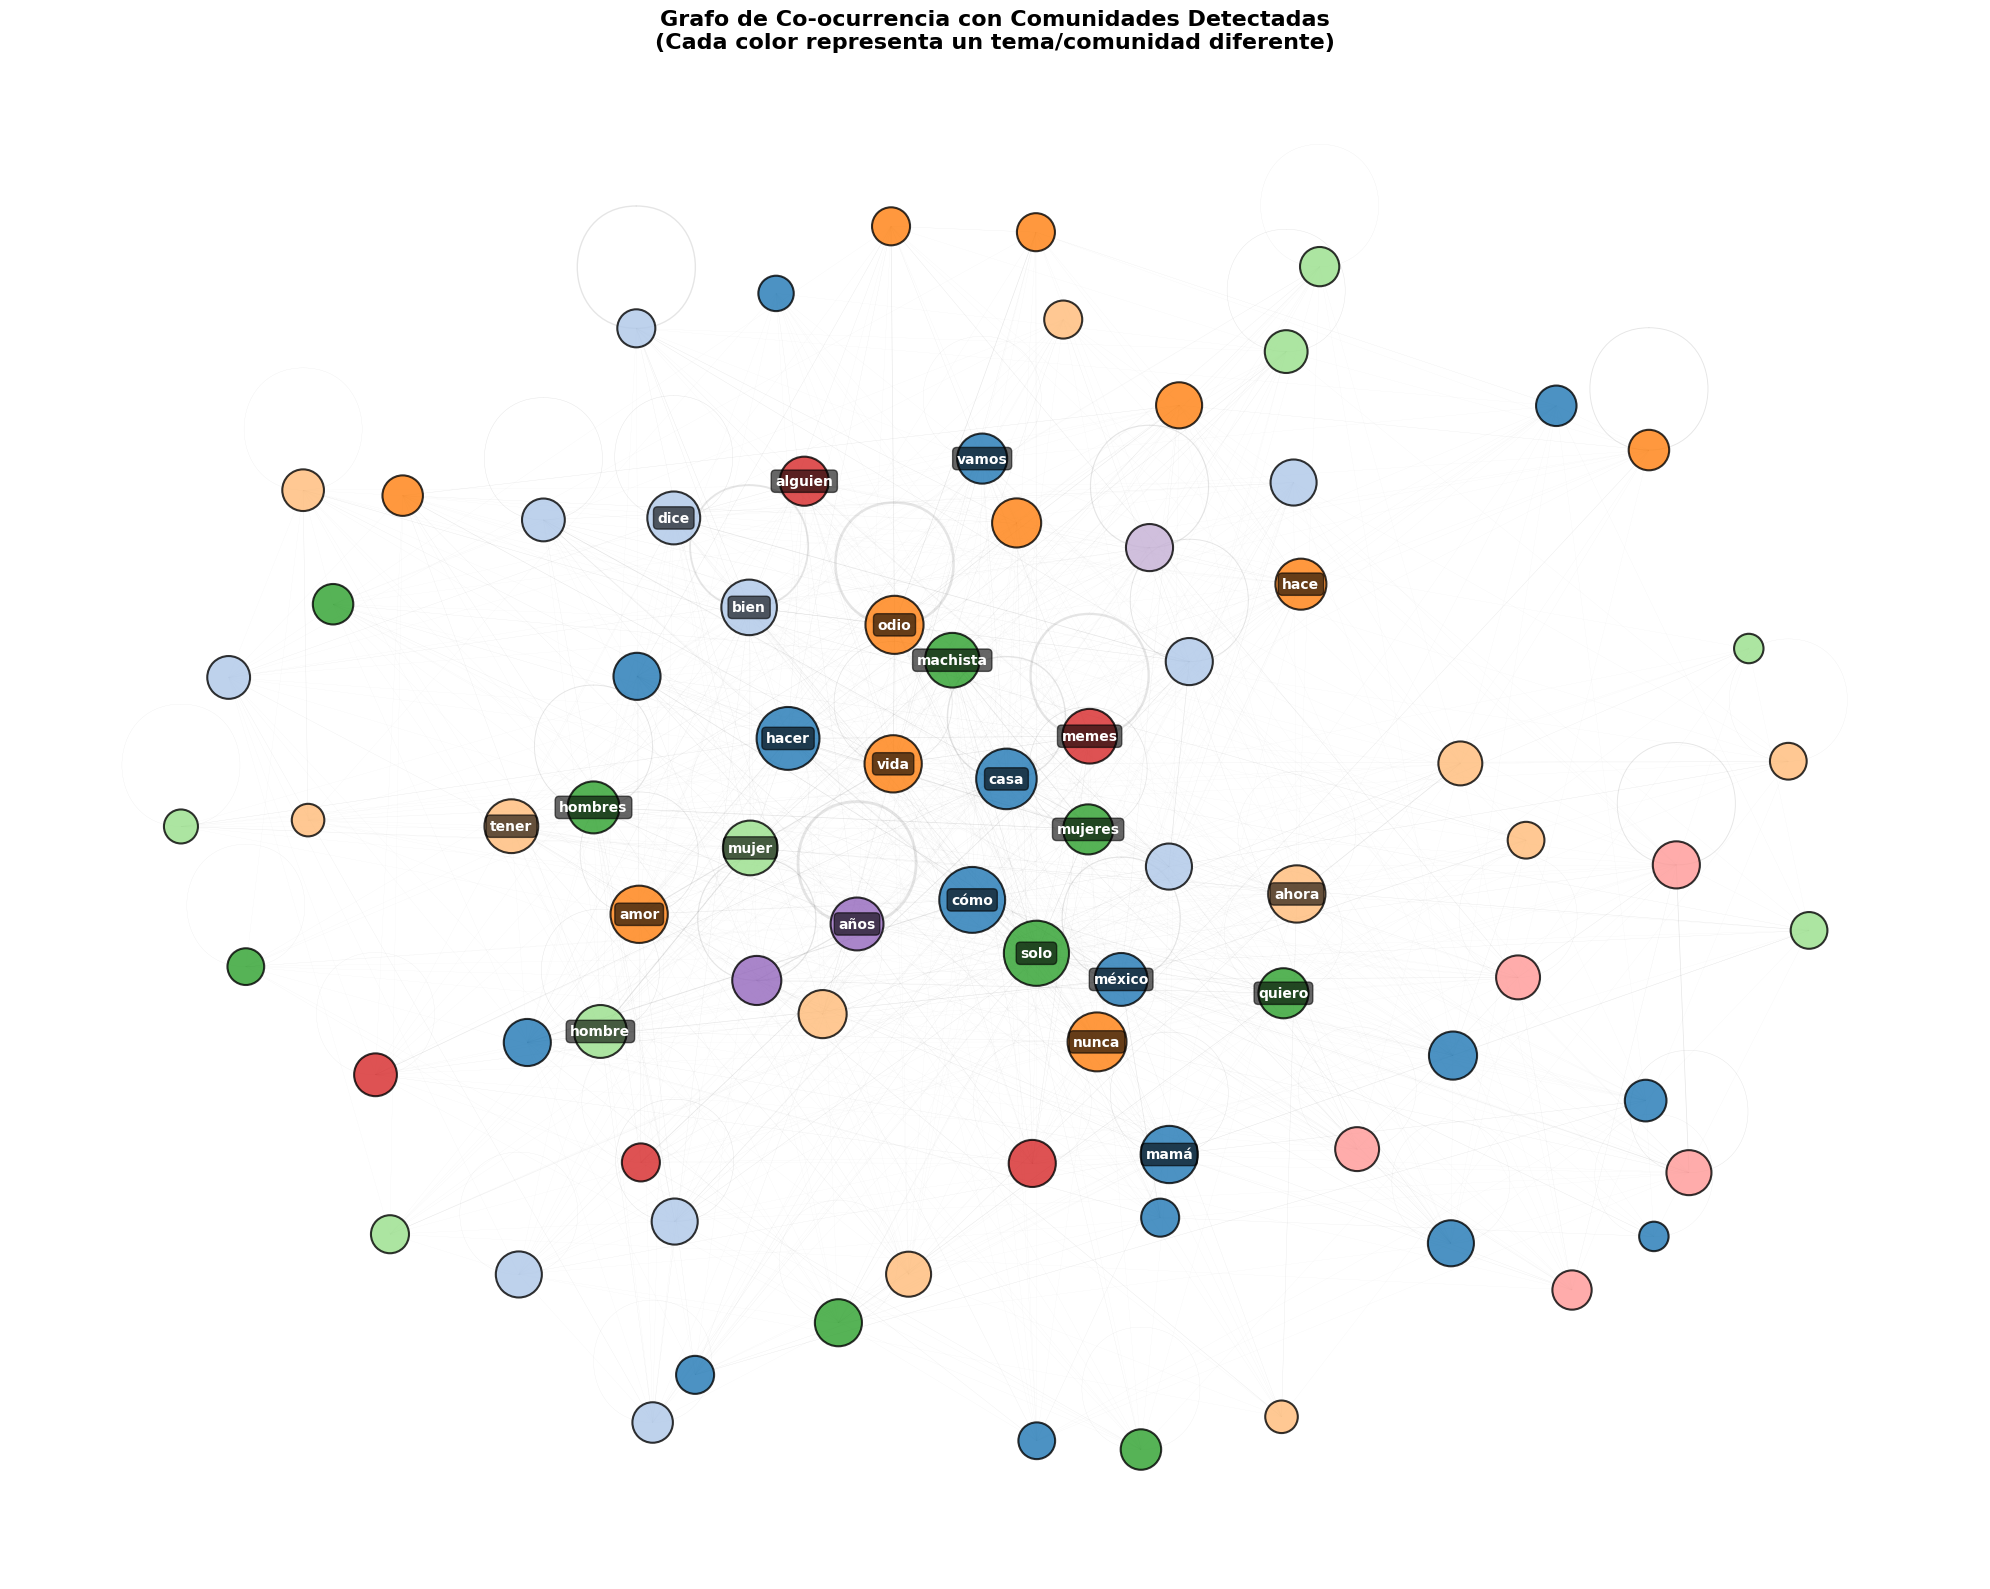


Modularidad del grafo: 0.3255
(Valores cercanos a 1 indican estructura de comunidades bien definida)


In [30]:
# Detectar comunidades en el grafo (para identificar cambios de tema)
from networkx.algorithms import community

print("Detectando comunidades en el grafo...")

# Usar el algoritmo de Louvain para detectar comunidades
communities = community.greedy_modularity_communities(G, weight='weight')

print(f"Número de comunidades detectadas: {len(communities)}")

# Asignar colores a cada comunidad
community_map = {}
colors_list = plt.cm.tab20(range(len(communities)))

for i, comm in enumerate(communities):
    for node in comm:
        community_map[node] = i

print("\nTamaño de cada comunidad:")
for i, comm in enumerate(communities):
    print(f"  Comunidad {i+1}: {len(comm)} palabras")
    # Mostrar algunas palabras de la comunidad
    sample_words = list(comm)[:8]
    print(f"    Ejemplo: {', '.join(sample_words)}")

# Visualizar el grafo con comunidades coloreadas
plt.figure(figsize=(20, 16))

# Layout
pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

# Colores por comunidad
node_colors = [colors_list[community_map[node]] for node in G.nodes()]
node_sizes = [G.degree(node) * 50 for node in G.nodes()]

# Dibujar
nx.draw_networkx_nodes(G, pos, 
                       node_size=node_sizes,
                       node_color=node_colors,
                       alpha=0.8,
                       edgecolors='black',
                       linewidths=1.5)

edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
max_weight = max(weights) if weights else 1
edge_widths = [w / max_weight * 2 for w in weights]

nx.draw_networkx_edges(G, pos, 
                       width=edge_widths,
                       alpha=0.2,
                       edge_color='gray')

# Labels para nodos importantes
degree_dict = dict(G.degree())
top_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:25]
labels = {node: node for node, _ in top_nodes}

nx.draw_networkx_labels(G, pos, 
                       labels=labels,
                       font_size=10,
                       font_weight='bold',
                       font_color='white',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.6))

plt.title('Grafo de Co-ocurrencia con Comunidades Detectadas\n(Cada color representa un tema/comunidad diferente)', 
         fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

# Calcular modularidad
modularity = community.modularity(G, communities, weight='weight')
print(f"\nModularidad del grafo: {modularity:.4f}")
print("(Valores cercanos a 1 indican estructura de comunidades bien definida)")

## Interpretación: Análisis de Co-ocurrencia y Redes

### Estructura del Grafo

El grafo de co-ocurrencia revela cómo las palabras se relacionan entre sí en el corpus de memes. Los nodos representan palabras y las aristas indican que aparecen juntas en una ventana de contexto.

### Métricas de Centralidad: Insights Clave

1. **Degree Centrality (Grado de Conexión)**
   - Identifica las palabras más conectadas en el vocabulario
   - Palabras con alto grado actúan como "hubs" temáticos
   - Indican términos que aparecen consistentemente en múltiples contextos

2. **Betweenness Centrality (Intermediación)**
   - Revela palabras que sirven como "puentes" entre diferentes temas
   - Alto betweenness sugiere términos que conectan conceptos diversos
   - Crucial para identificar puntos de transición temática

3. **Closeness Centrality (Cercanía)**
   - Mide qué tan rápido una palabra puede "alcanzar" a otras en la red
   - Palabras con alta cercanía están en el centro semántico del corpus
   - Representan conceptos centrales en el discurso de los memes

4. **Eigenvector Centrality (Influencia)**
   - Identifica palabras conectadas a otras palabras importantes
   - No solo importa cuántas conexiones, sino la calidad de esas conexiones
   - Revela términos que aparecen en contextos de alta relevancia

5. **PageRank (Importancia)**
   - Adaptación del algoritmo de Google para medir importancia
   - Considera tanto conexiones directas como indirectas
   - Palabras con alto PageRank son conceptualmente centrales

### Detección de Comunidades y Cambios Temáticos

- Las **comunidades detectadas** representan clusters de palabras que co-ocurren frecuentemente
- Cada comunidad agrupa términos relacionados semánticamente (un "tema")
- Los **cambios de tema** ocurren en las fronteras entre comunidades
- Palabras con alto **betweenness** que aparecen en múltiples comunidades son puntos de transición

### Modularidad

- Una modularidad alta (cercana a 1) indica que el corpus tiene temas bien diferenciados
- Modularidad baja sugiere temas entremezclados o discurso más homogéneo
- En el contexto de memes de odio, comunidades claras pueden corresponder a:
  - Tipos específicos de discriminación (sexismo, racismo, clasismo)
  - Diferentes estilos de lenguaje (humor, agresión directa)
  - Targets específicos de los mensajes

### Aplicación Práctica

Este análisis permite:
- **Identificar vocabulario clave** para clasificación
- **Detectar patrones lingüísticos** asociados a cada categoría
- **Comprender transiciones** entre lenguaje neutral e inapropiado
- **Mejorar features** para modelos de clasificación basados en relaciones entre palabras